In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pylab as pl
import ot
import ot.plot

In [2]:
get_rot= lambda theta : np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
def make_blobs_reg(n_samples, n_blobs, scale=.5):
    per_blob=int(n_samples/n_blobs)
    result = np.random.randn(per_blob,2) * scale + 5
    theta=(2*np.pi)/(n_blobs)
    for r in range(1,n_blobs):
        new_blob=(np.random.randn(per_blob,2) * scale + 5).dot(get_rot(theta*r))
        result = np.vstack((result,new_blob))
    return result

# random MoG
def make_blobs_random(n_samples, n_blobs, scale=.5, offset=3):
    per_blob=int(n_samples/n_blobs)
    result = np.random.randn(per_blob,2) * scale + np.random.randn(1,2)*offset
    for r in range(1,n_blobs):
        new_blob=np.random.randn(per_blob,2) * scale + np.random.randn(1,2)*offset
        result = np.vstack((result,new_blob))
    return result

#%%
def make_spiral(n_samples, noise=.5):
    n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
    return np.array(np.hstack((d1x,d1y)))

def make_cube(n_samples,dim):
    n_samples=int(n_samples)
    return np.random.random((n_samples, dim)) * 2 - 1
    
def make_data(expe,n_samples,dim=2,device='cpu'):
    if expe=='spirals':
        r=2.5
        xs = make_spiral(n_samples=n_samples, noise=1)
        xt = make_spiral(n_samples=n_samples, noise=1).dot(get_rot(r))
    elif expe=='mog_reg':
        r=.5
        xs = make_blobs_reg(n_samples=n_samples, n_blobs=3)
        xt = make_blobs_reg(n_samples=n_samples, n_blobs=3).dot(get_rot(r))
    elif expe=='two_moons':
        X, y = sklearn.datasets.make_moons(n_samples=n_samples, noise=0.05)
        xs = X[y==0,:]
        xt = X[y==1,:]
    elif expe=='cube':
        #xs=Transform_cube(make_cube(n_samples,dim))
        xs=make_cube(n_samples,dim)
        xt=make_cube(n_samples,dim)
    elif expe=='gaussians' :
        mu_s=np.zeros(dim)
        cov_s=np.ones(dim)
        cov_s = cov_s * np.eye(dim)

        mu_t=np.zeros(dim)
        cov_t=np.ones(dim)
        cov_t = cov_t * np.eye(dim)
        
        xs = np.random.multivariate_normal(mu_s, cov_s, n_samples)
        xt = np.random.multivariate_normal(mu_t, cov_t, n_samples)
    return xs,xt

In [3]:
def plot3D_samples_mat(xs, xt, G, thr=1e-8, **kwargs):
    if ('color' not in kwargs) and ('c' not in kwargs):
        kwargs['color'] = 'k'
    mx = G.max()
    if 'alpha' in kwargs:
        scale = kwargs['alpha']
        del kwargs['alpha']
    else:
        scale = 1
    for i in range(xs.shape[0]):
        for j in range(xt.shape[0]):
            if G[i, j] / mx > thr:
                #ax = fig.add_subplot(111, projection='3d')
                ax.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]],zs=[xs[i, 2], xt[j, 2]],alpha=G[i, j] / mx * scale, **kwargs)

# Exemple en dimension 2

In [42]:
d=2
n=100

xs,xt=make_data('gaussians',n,d)

a=np.ones((n,))/n
b=np.ones((n,))/n

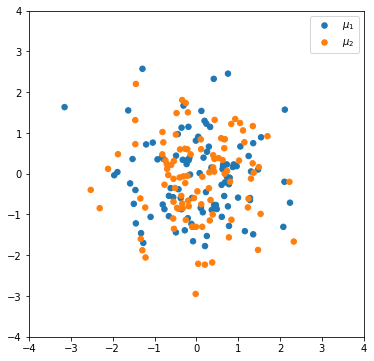

In [43]:
pl.figure(figsize=(6,6))
pl.scatter(xs[:,0],xs[:,1],s=a*n*30,label='$\mu_1$')
pl.scatter(xt[:,0],xt[:,1],s=b*n*30,label='$\mu_2$')
pl.legend()
pl.xlim(-4,4)
pl.ylim(-4,4)
pl.show()

Text(0.5, 1.0, 'Cost Matrix')

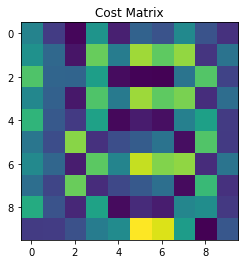

In [8]:
C = ot.dist(xs, xt)
pl.imshow(C)
pl.title('Cost Matrix')

Text(0.5, 1.0, 'Transport matrix')

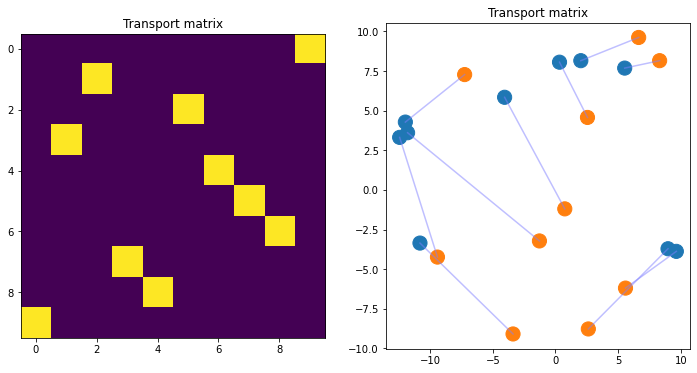

In [13]:
P = ot.emd(a, b, C)

pl.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(P, interpolation='nearest')
pl.title('Transport matrix')

pl.subplot(122)
ot.plot.plot2D_samples_mat(xs, xt, P, c=[.5, .5, 1],alpha=0.5)
pl.scatter(xs[:, 0], xs[:, 1],s=a*2e3)
pl.scatter(xt[:, 0], xt[:, 1],s=b*2e3)
pl.title('Transport matrix')

In [44]:
sum(sum(P*C))

1.0907681298242702

# Un autre exemple avec une autre distributions

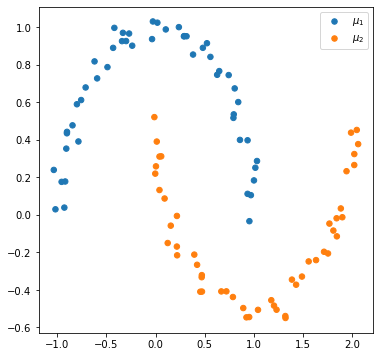

Text(0.5, 1.0, 'Transport matrix')

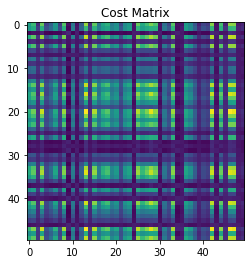

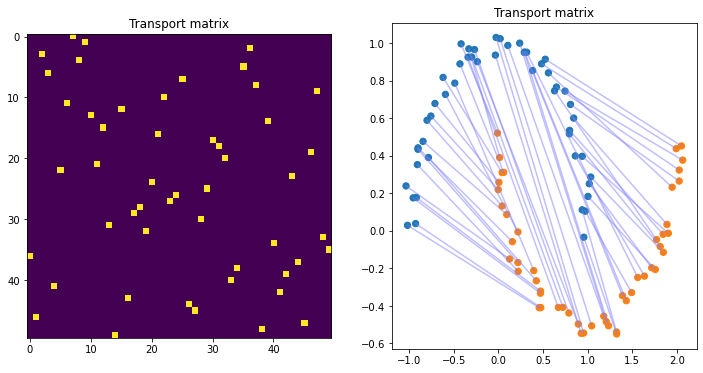

In [14]:
d=2
n=100

xs,xt=make_data('two_moons',n,d)

n=xs.shape[0]

a=np.ones((n,))/n
b=np.ones((n,))/n

pl.figure(figsize=(6,6))
pl.scatter(xs[:,0],xs[:,1],s=a*n*30,label='$\mu_1$')
pl.scatter(xt[:,0],xt[:,1],s=b*n*30,label='$\mu_2$')
pl.legend()
pl.show()

C = ot.dist(xs, xt)
pl.imshow(C)
pl.title('Cost Matrix')

P = ot.emd(a, b, C)

pl.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(P, interpolation='nearest')
pl.title('Transport matrix')

pl.subplot(122)
ot.plot.plot2D_samples_mat(xs, xt, P, c=[.5, .5, 1],alpha=0.5)
pl.scatter(xs[:, 0], xs[:, 1],s=a*2e3)
pl.scatter(xt[:, 0], xt[:, 1],s=b*2e3)
pl.title('Transport matrix')

# Exemple quand le nombre de point n'est pas le même

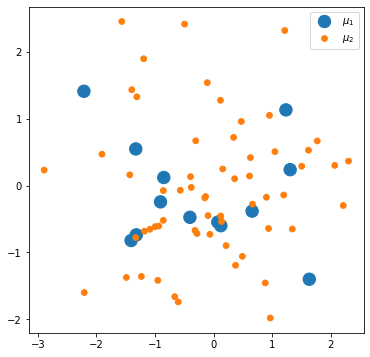

Text(0.5, 1.0, 'Transport matrix')

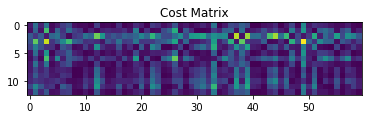

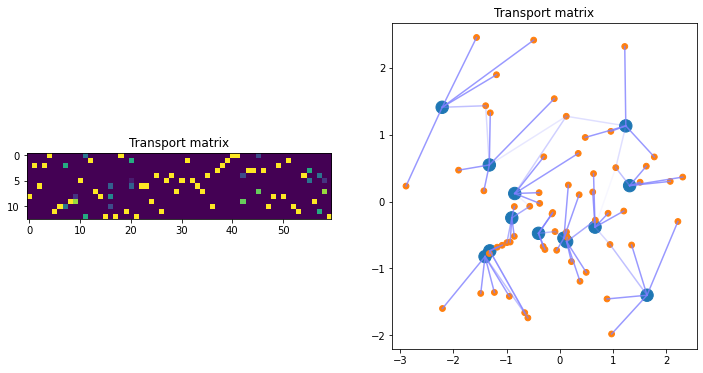

In [18]:
d=2

_,xt=make_data('gaussians',60,d)
xs,_=make_data('gaussians',13,d)




n1=xs.shape[0]
n2=xt.shape[0]

a=np.ones((n1,))/n1
b=np.ones((n2,))/n2

pl.figure(figsize=(6,6))
pl.scatter(xs[:,0],xs[:,1],s=a*2e3,label='$\mu_1$')
pl.scatter(xt[:,0],xt[:,1],s=b*2e3,label='$\mu_2$')
pl.legend()
pl.show()

C = ot.dist(xs, xt)
pl.imshow(C)
pl.title('Cost Matrix')

P = ot.emd(a, b, C)

pl.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(P, interpolation='nearest')
pl.title('Transport matrix')

pl.subplot(122)
ot.plot.plot2D_samples_mat(xs, xt, P, c=[.5, .5, 1],alpha=0.8)
pl.scatter(xs[:, 0], xs[:, 1],s=a*2e3)
pl.scatter(xt[:, 0], xt[:, 1],s=b*2e3)
pl.title('Transport matrix')

# Exemple en dimension 3 quand le nombre de point n'est pas le même

Text(0.5, 0.92, 'Transport matrix')

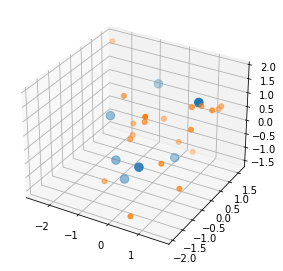

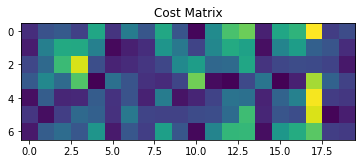

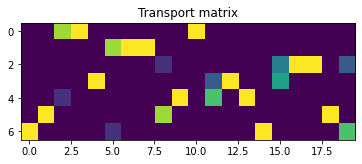

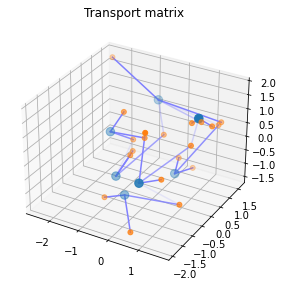

In [21]:
d=3

_,xt=make_data('gaussians',20,d)
xs,_=make_data('gaussians',7,d)


n1=xs.shape[0]
n2=xt.shape[0]

a=np.ones((n1,))/n1
b=np.ones((n2,))/n2

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(121, projection='3d')
pl.scatter(xs[:,0],xs[:,1],zs=xs[:,2],s=a*5e2)
pl.scatter(xt[:,0],xt[:,1],zs=xt[:,2],s=b*5e2)

pl.figure()
C = ot.dist(xs, xt)
pl.imshow(C)
pl.title('Cost Matrix')

P = ot.emd(a, b, C)
pl.figure()
pl.imshow(P, interpolation='nearest')
pl.title('Transport matrix')

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(122, projection='3d')
plot3D_samples_mat(xs, xt, P, c=[.5, .5, 1],alpha=1)
pl.scatter(xs[:,0],xs[:,1],zs=xs[:,2],s=a*5e2)
pl.scatter(xt[:,0],xt[:,1],zs=xt[:,2],s=b*5e2)
pl.title('Transport matrix')

# Exemple quand les poids des distributions sont tirés au hasard

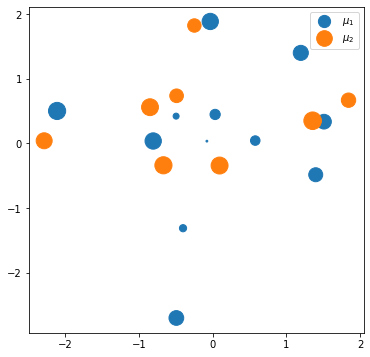

Text(0.5, 1.0, 'Transport matrix')

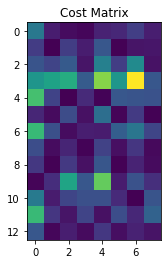

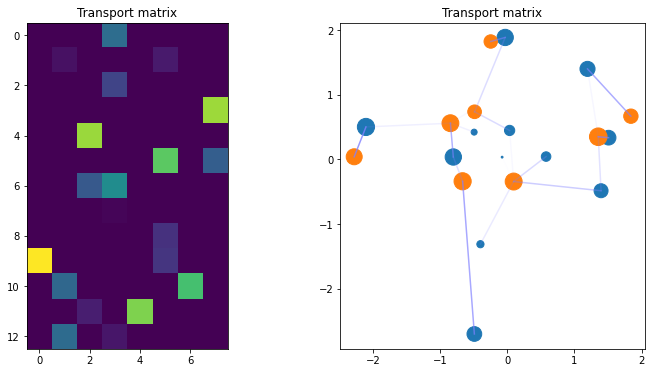

In [20]:
d=2

_,xt=make_data('gaussians',8,d)
xs,_=make_data('gaussians',13,d)


n1=xs.shape[0]
n2=xt.shape[0]

a=np.random.randint(1,500,n1)
a=a/np.sum(a)
b=np.random.randint(1,500,n2)/n2
b=b/np.sum(b)

pl.figure(figsize=(6,6))
pl.scatter(xs[:,0],xs[:,1],s=a*2e3,label='$\mu_1$')
pl.scatter(xt[:,0],xt[:,1],s=b*2e3,label='$\mu_2$')
pl.legend()
pl.show()

C = ot.dist(xs, xt)
pl.imshow(C)
pl.title('Cost Matrix')

P = ot.emd(a, b, C)

pl.figure(figsize=(12,6))
pl.subplot(121)
pl.imshow(P, interpolation='nearest')
pl.title('Transport matrix')

pl.subplot(122)
ot.plot.plot2D_samples_mat(xs, xt, P, c=[.5, .5, 1],alpha=0.8)
pl.scatter(xs[:, 0], xs[:, 1],s=a*2e3)
pl.scatter(xt[:, 0], xt[:, 1],s=b*2e3)
pl.title('Transport matrix')

# Exemple with Gaussian distribution in 1D

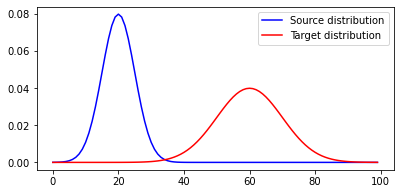

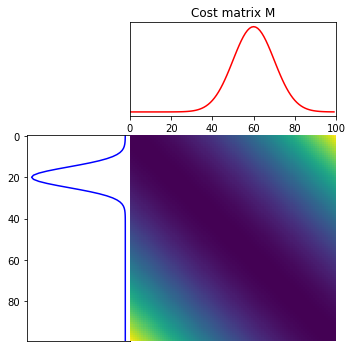

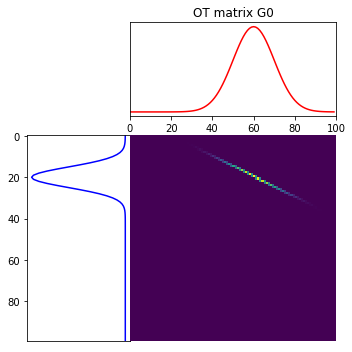

In [62]:
from ot.datasets import make_1D_gauss as gauss

n = 100  
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
C = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))


pl.figure( figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

pl.figure( figsize=(5, 5))
ot.plot.plot1D_mat(a, b, C, 'Cost matrix M')

# use fast 1D solver
P = ot.emd_1d(x, x, a, b)

pl.figure(figsize=(5, 5))
ot.plot.plot1D_mat(a, b, P, 'OT matrix G0')